## Hierarichal Clustring Implementation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [4]:
#Import iris dataset
data = datasets.load_iris()

In [5]:
df = pd.DataFrame(data.data)

In [7]:
df.columns=data.feature_names

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#Feature scaling 
from sklearn.preprocessing  import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
X_scaled = scaler.fit_transform(df)

In [15]:
X_scaled.shape

(150, 4)

In [16]:
# Apply PCA 
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca_scaled = pca.fit_transform(X_scaled)

In [20]:
pca_scaled.shape

(150, 2)

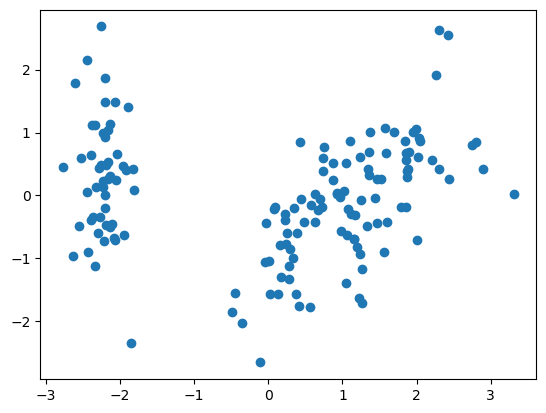

In [21]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

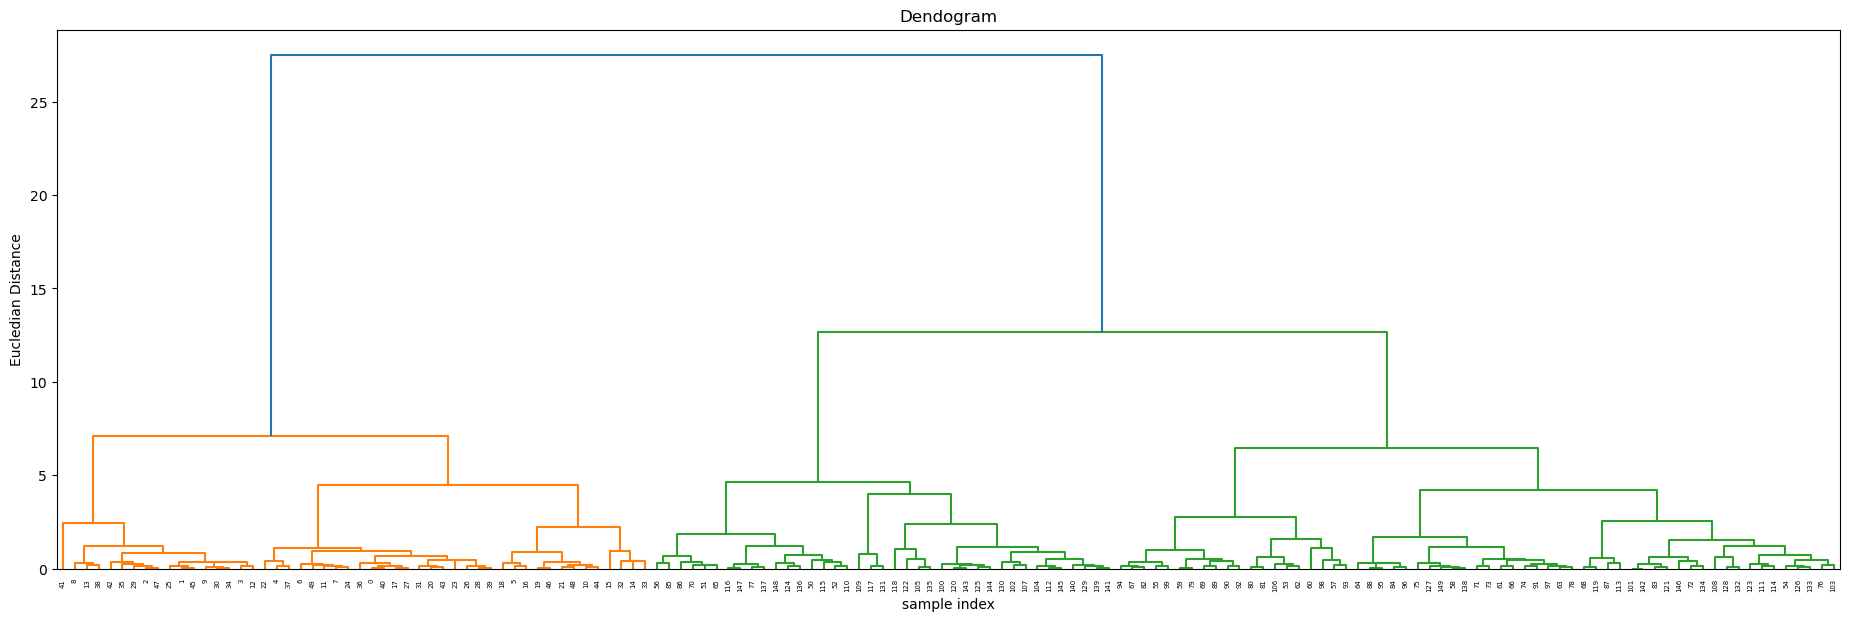

In [25]:
## Agglomerative Clustring 
## To construct a dendogram 

import scipy.cluster.hierarchy as sc 
##plot the dendogram 
plt.figure(figsize=(23,7))

#create a dendogram 

sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendogram")
plt.xlabel("sample index")
plt.ylabel("Eucledian Distance")

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [28]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

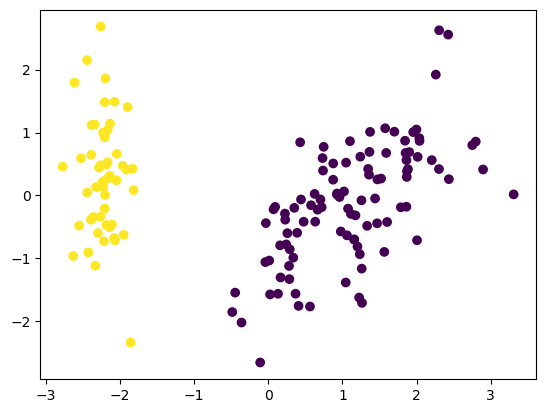

In [30]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [31]:
## silhouette score
from sklearn.metrics import silhouette_score


In [32]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

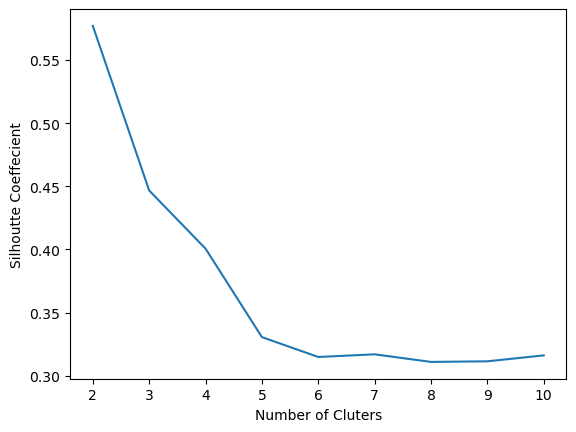

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()